In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Regression Task**

# Exploratory Data Analysis and Data Understanding

## Task 1: Exploratory Data Analysis and Data *Understanding*

### **Imports**

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
# Load the dataset
file_path = "/content/drive/MyDrive/AI dataset/pcos_prediction_dataset.csv"
df = pd.read_csv(file_path)

In [32]:
# Display basic information about the dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity                59915 non-null   object 
 6   Family History of PCOS       120000 non-null  object 
 7   Insulin Resistance           120000 non-null  object 
 8   Lifestyle Score              120000 non-null  int64  
 9   Stress Levels                120000 non-null  object 
 10  Urban/Rural                  120000 non-null  object 
 11  Socioeconomic Status         120000 non-null  object 
 12  Awareness of PCOS            120000 non-null  object 
 13 

In [34]:
# Checking for missing values
print(df.isnull().sum())

# Drop columns with excessive missing values (if any)
df.dropna(inplace=True)

# List all attributes
print("Dataset Columns: ", df.columns.tolist())


Country                        0
Age                            0
BMI                            0
Menstrual Regularity           0
Hirsutism                      0
Acne Severity                  0
Family History of PCOS         0
Insulin Resistance             0
Lifestyle Score                0
Stress Levels                  0
Urban/Rural                    0
Socioeconomic Status           0
Awareness of PCOS              0
Fertility Concerns             0
Undiagnosed PCOS Likelihood    0
Ethnicity                      0
Diagnosis                      0
dtype: int64
Dataset Columns:  ['Country', 'Age', 'BMI', 'Menstrual Regularity', 'Hirsutism', 'Acne Severity', 'Family History of PCOS', 'Insulin Resistance', 'Lifestyle Score', 'Stress Levels', 'Urban/Rural', 'Socioeconomic Status', 'Awareness of PCOS', 'Fertility Concerns', 'Undiagnosed PCOS Likelihood', 'Ethnicity', 'Diagnosis']


# **Task 2: Conducting Exploratory Data Analysis (EDA)**

## 2.1 Data Cleaning & Summary Statistics

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values (if necessary)
df.dropna(inplace=True)

# Summary statistics
print(df.describe())


                Age  Lifestyle Score  Undiagnosed PCOS Likelihood
count  59915.000000     59915.000000                 59915.000000
mean      31.942402         5.497789                     0.149960
std       10.094978         2.865160                     0.057761
min       15.000000         1.000000                     0.050002
25%       23.000000         3.000000                     0.099872
50%       32.000000         5.000000                     0.149860
75%       41.000000         8.000000                     0.200246
max       49.000000        10.000000                     0.249998


# 2.2 Visualizations & Insights

# Boxplot for BMI vs Undiagnosed PCOS Likelihood

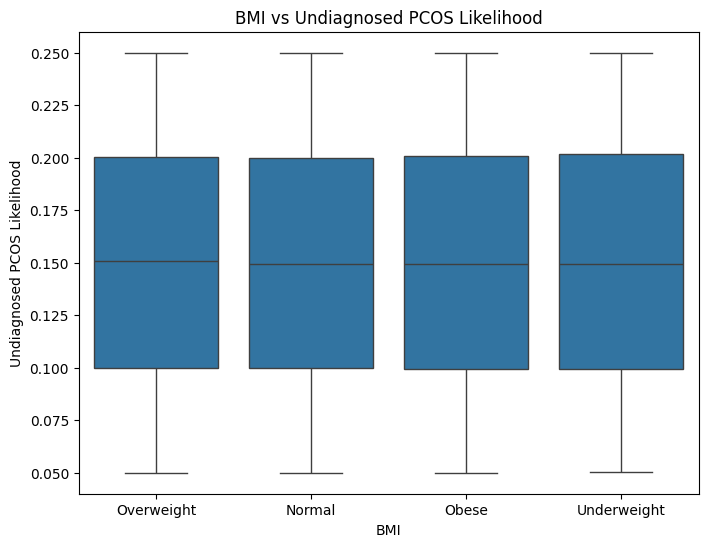

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["BMI"], y=df["Undiagnosed PCOS Likelihood"])
plt.title("BMI vs Undiagnosed PCOS Likelihood")
plt.show()


# Count Plot for Menstrual Regularity

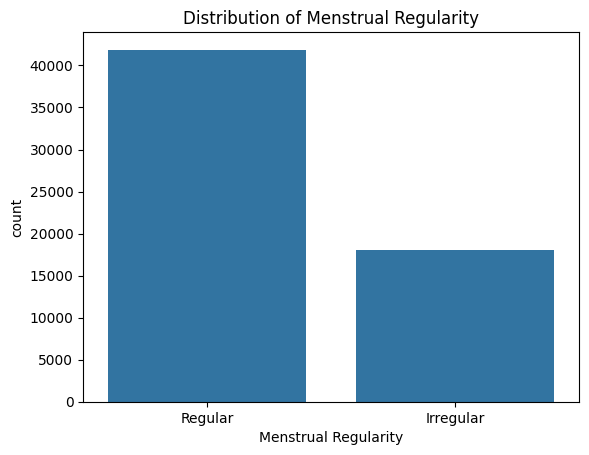

In [37]:
sns.countplot(x=df["Menstrual Regularity"])
plt.title("Distribution of Menstrual Regularity")
plt.show()


# Task 3: Build a Model from Scratch

# 3.1 Data Preprocessing & Splitting

In [38]:

# Define target and features
target = "Undiagnosed PCOS Likelihood"
X = df.drop(columns=[target])
y = df[target]

# Convert categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


The "Undiagnosed PCOS Likelihood" column, consisting of continuous values, serves as the target variable for the regression task, with features and targets separated accordingly.

3.2 Build a Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

# Evaluation
print("Linear Regression Performance:")
print("Train R-squared:", r2_score(y_train, y_pred_train))
print("Test R-squared:", r2_score(y_test, y_pred_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))


Linear Regression Performance:
Train R-squared: 0.002463343529426343
Test R-squared: -0.0011312757496875214
Test MSE: 0.003300812939421059


# **Task 4: Build a Primary Model**

In [40]:
# Initialize models
ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()

models = {'Ridge Regression': ridge, 'Lasso Regression': lasso, 'Random Forest': rf}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n{name} Performance:")
    print("R-squared:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))


Ridge Regression Performance:
R-squared: -0.0011311609687805202
MSE: 0.003300812560978878

Lasso Regression Performance:
R-squared: -7.79532263694982e-06
MSE: 0.0032971087311712286

Random Forest Performance:
R-squared: -0.03877627491845548
MSE: 0.0034249316273201203


# Hyperparameter Tuning with RandomizedSearchCV

In [49]:
# Hyperparameter Tuning for Regression
regressor = RandomForestRegressor(random_state=42)
regressor_params = {
    'n_estimators': [10,20],
    'max_depth': [1,2],
    'min_samples_split': [1,2]
}
reg_grid = GridSearchCV(estimator=regressor, param_grid=regressor_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
reg_grid.fit(X_train_reg, y_train_reg)

# Hyperparameter Tuning for Classification
classifier = RandomForestClassifier(random_state=42)
classifier_params = {
    'n_estimators': [10, 20],
    'max_depth': [1,2],
    'min_samples_split': [1,2]
}
clf_grid = GridSearchCV(estimator=classifier, param_grid=classifier_params, cv=5, scoring='accuracy', n_jobs=-1)
clf_grid.fit(X_train_clf, y_train_clf)

# Best Parameters
best_reg_params = reg_grid.best_params_
best_clf_params = clf_grid.best_params_

print('Best parameters for regression:', best_reg_params)
print('Best parameters for classification:', best_clf_params)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Best parameters for regression: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best parameters for classification: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [50]:
from sklearn.feature_selection import SelectFromModel

# Feature Selection for Regression
reg_selector = SelectFromModel(reg_grid.best_estimator_, threshold='mean', prefit=False)
reg_selector.fit(X_train_reg, y_train_reg)
selected_features_reg = X_train_reg[:, reg_selector.get_support()]

# Feature Selection for Classification
clf_selector = SelectFromModel(clf_grid.best_estimator_, threshold='mean', prefit=False)
clf_selector.fit(X_train_clf, y_train_clf)
selected_features_clf = X_train_clf[:, clf_selector.get_support()]

# Get selected feature indices
selected_reg_indices = np.where(reg_selector.get_support())[0]
selected_clf_indices = np.where(clf_selector.get_support())[0]

# Print selected features
print("Selected features for Regression Model:", selected_reg_indices)
print("Selected features for Classification Model:", selected_clf_indices)

Selected features for Regression Model: [ 7 40 54 60 63]
Selected features for Classification Model: [ 0 19 21 26 28 34 48 56 60 71]


In [51]:
from sklearn.metrics import mean_squared_error, accuracy_score

# Selecting Important Features
X_train_final = X_train_clf[:, selected_clf_indices]  # Using best features for classification
X_test_final = X_test_clf[:, selected_clf_indices]    # Applying same transformation to test data

# Final Model Training with Best Hyperparameters
final_model = RandomForestClassifier(**best_clf_params, random_state=42)
final_model.fit(X_train_final, y_train_clf)

# Model Predictions
y_pred = final_model.predict(X_test_final)

# Model Performance Evaluation
accuracy = accuracy_score(y_test_clf, y_pred)
print("🔹 Final Model Accuracy:", accuracy)

🔹 Final Model Accuracy: 0.8940416666666666
